#  CSCI‑580  |  Assignment #5 – Perceptron  

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

## Data Loading

In [69]:
df = pd.read_csv("data.csv", header=None, names=["x1", "x2", "y"])
X  = df[["x1", "x2"]].values
y  = df["y"].values.astype(int)

In [70]:
def sigmoid(z): return 1.0 / (1.0 + np.exp(-z))

def draw_line(ax, w, b, *, color, style, width):
    xs = np.array([0.0, 1.0])
    if abs(w[1]) > 1e-9:
        ys = -(w[0]*xs + b) / w[1]
        ax.plot(xs, ys, linestyle=style, color=color, linewidth=width)
    else:
        x_vert = -b / w[0]
        ax.plot([x_vert,x_vert], [0,1], linestyle=style,
                color=color, linewidth=width)

## PART 1  – Heuristic / Plain Perceptron

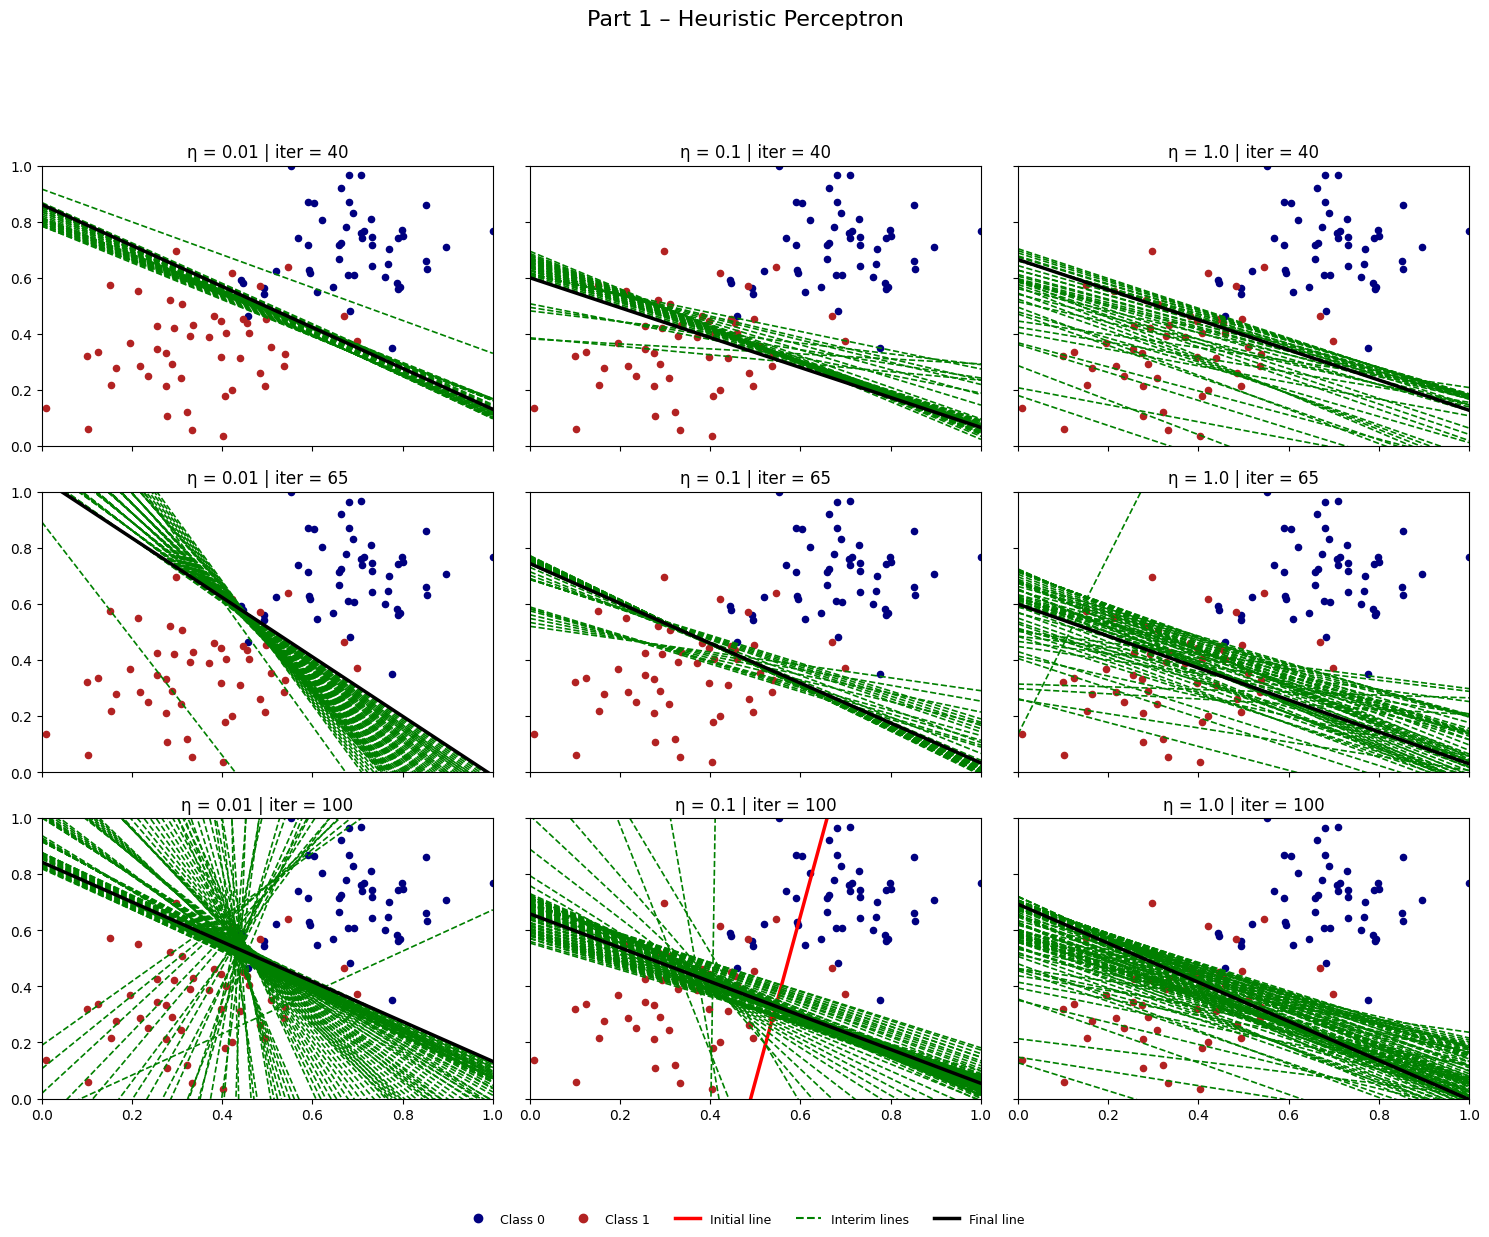

In [71]:
def perceptron_heuristic(X, y, lr=0.1, max_iters=65):
    rng = np.random.default_rng()
    w   = rng.standard_normal(2)
    b   = rng.standard_normal()
    history = [(w.copy(), b)]                      # store initial line
    for _ in range(max_iters):
        for xi, yi in zip(X, y):
            y_hat = 1 if (np.dot(w, xi) + b) >= 0 else 0
            if y_hat != yi:                       # mis‑classified
                if y_hat == 0:                    # move toward +class
                    b += lr;  w += lr * xi
                else:                             # move toward –class
                    b -= lr;  w -= lr * xi
        history.append((w.copy(), b))
    return history

lr_list   = [0.01, 0.1, 1.0]
iter_list = [40, 65, 100]


legend_handles = [
    mlines.Line2D([], [], color='navy',      marker='o', linestyle='None',
                  markersize=6, label='Class 0'),
    mlines.Line2D([], [], color='firebrick', marker='o', linestyle='None',
                  markersize=6, label='Class 1'),
    mlines.Line2D([], [], color='red',   linewidth=2.5, label='Initial line'),
    mlines.Line2D([], [], color='green', linewidth=1.5, linestyle='dashed',
                  label='Interim lines'),
    mlines.Line2D([], [], color='black', linewidth=2.5, label='Final line')
]

fig, axes = plt.subplots(len(iter_list), len(lr_list),
                         figsize=(5*len(lr_list), 4*len(iter_list)),
                         sharex=True, sharey=True)

for row, max_iter in enumerate(iter_list):
    for col, lr in enumerate(lr_list):
        ax   = axes[row, col] if axes.ndim == 2 else axes[col]
        hist = perceptron_heuristic(X, y, lr=lr, max_iters=max_iter)

        # data points
        ax.scatter(X[y == 0, 0], X[y == 0, 1], c='navy',      s=20)
        ax.scatter(X[y == 1, 0], X[y == 1, 1], c='firebrick', s=20)

        # decision boundaries
        draw_line(ax, *hist[0],  color='red',   style='solid',  width=2.5)   # initial
        for w, b in hist[1:-1]:
            draw_line(ax, w, b,  color='green', style='dashed', width=1.2)   # interim
        draw_line(ax, *hist[-1], color='black', style='solid',  width=2.5)   # final

        ax.set_xlim(0, 1);  ax.set_ylim(0, 1)
        ax.set_title(f'η = {lr} | iter = {max_iter}')

fig.legend(handles=legend_handles, loc='lower center',
           ncol=len(legend_handles), frameon=False, fontsize=9)

fig.suptitle('Part 1 – Heuristic Perceptron', fontsize=16, y=1.02)
fig.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()



## PART 2  –  Gradient‑Descent Perceptron with Sigmoid

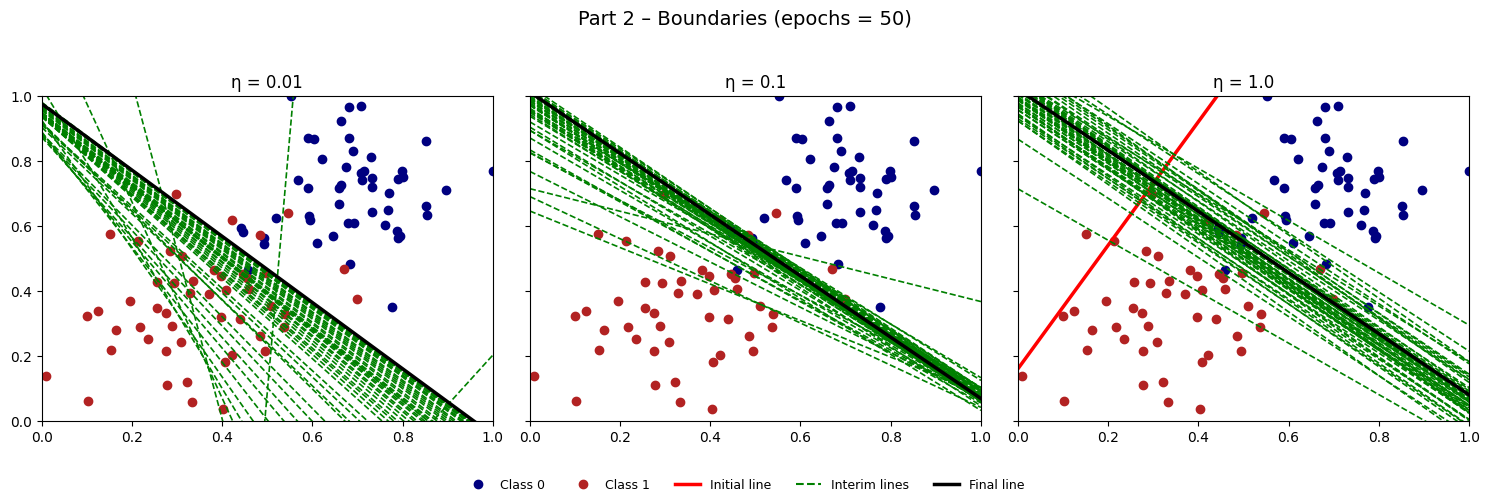

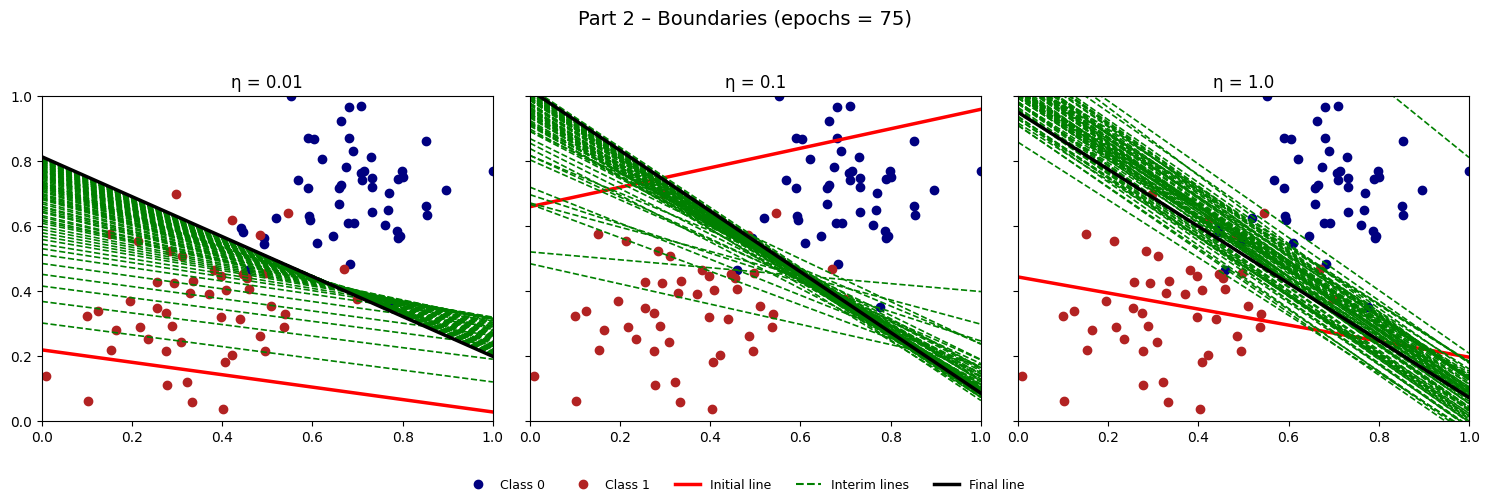

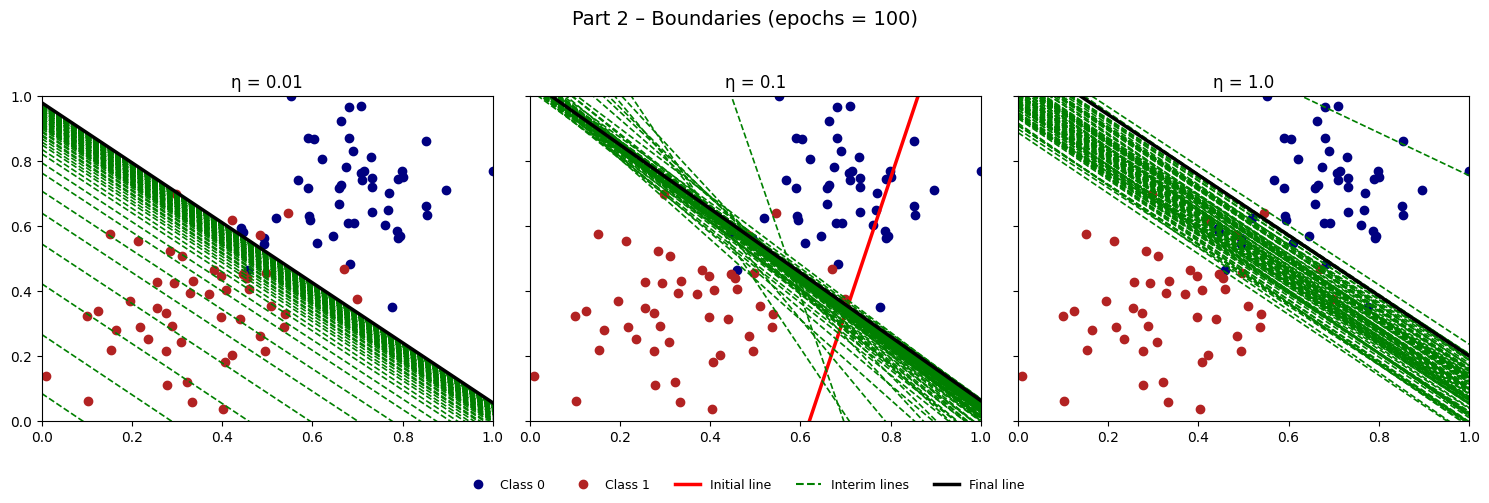

In [72]:
def perceptron_gd(X, y, lr=0.05, epochs=100):
    rng = np.random.default_rng()
    w   = rng.standard_normal(2)
    b   = rng.standard_normal()
    history, losses = [(w.copy(), b)], []
    for ep in range(epochs):
        for idx in rng.permutation(len(X)):
            xi, yi = X[idx], y[idx]
            err    = yi - sigmoid(np.dot(w,xi) + b)
            b     += lr * err
            w     += lr * err * xi
        history.append((w.copy(), b))
        y_hat  = sigmoid(X @ w + b)
        ll     = -np.mean(y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9))
        losses.append(ll)
    return history, losses

lr_list_p2 = [0.01, 0.1, 1.0]
epoch_list = [50, 75, 100]


legend_handles = [
    mlines.Line2D([], [], color='navy',      marker='o', linestyle='None',
                  markersize=6, label='Class 0'),
    mlines.Line2D([], [], color='firebrick', marker='o', linestyle='None',
                  markersize=6, label='Class 1'),
    mlines.Line2D([], [], color='red',   linewidth=2.5, label='Initial line'),
    mlines.Line2D([], [], color='green', linewidth=1.5, linestyle='dashed',
                  label='Interim lines'),
    mlines.Line2D([], [], color='black', linewidth=2.5, label='Final line')
]

for epochs in epoch_list:
    fig, axes = plt.subplots(1, len(lr_list_p2),
                             figsize=(15, 5), sharex=True, sharey=True)

    for ax, lr in zip(axes, lr_list_p2):
        hist, loss = perceptron_gd(X, y, lr=lr, epochs=epochs)

        ax.scatter(X[y == 0, 0], X[y == 0, 1], c='navy')
        ax.scatter(X[y == 1, 0], X[y == 1, 1], c='firebrick')

        draw_line(ax, *hist[0],  color='red',   style='solid',  width=2.5)   # initial
        for w, b in hist[1:-1]:
            draw_line(ax, w, b, color='green', style='dashed', width=1.2)    # interim
        draw_line(ax, *hist[-1], color='black', style='solid', width=2.5)    # final

        ax.set_xlim(0, 1);  ax.set_ylim(0, 1)
        ax.set_title(f'η = {lr}')

    fig.legend(handles=legend_handles, loc='lower center',
               ncol=len(legend_handles), frameon=False, fontsize=9)

    fig.suptitle(f'Part 2 – Boundaries (epochs = {epochs})', fontsize=14)
    fig.tight_layout(rect=[0, 0.08, 1, 0.95])   # leave space for legend
    plt.show()



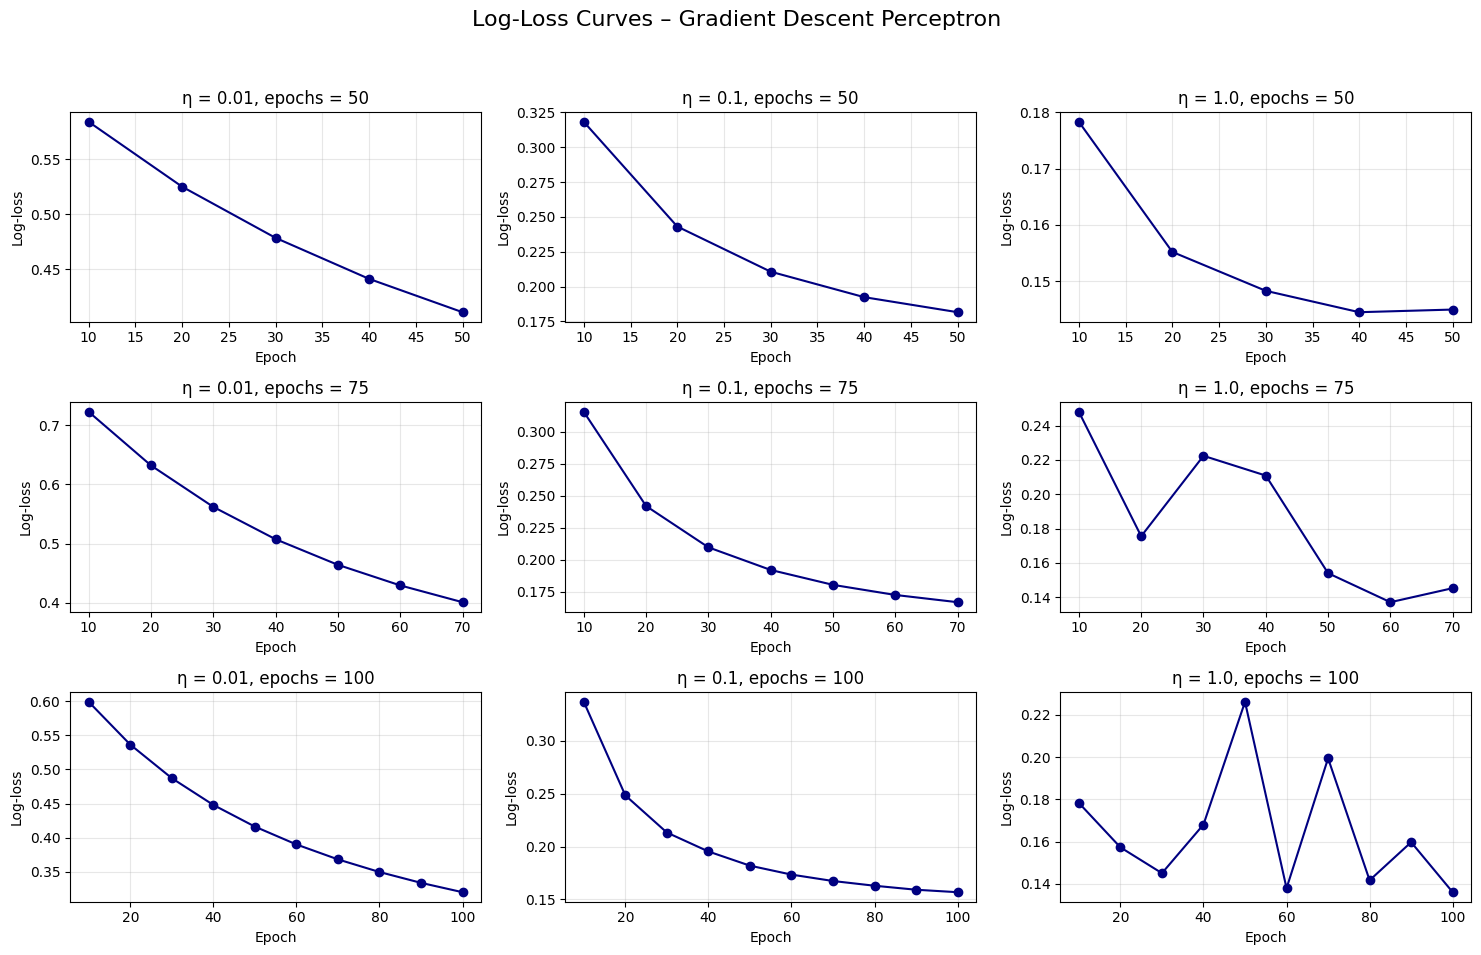

In [80]:
# Log-loss curve grid
lr_list = [0.01, 0.1, 1.0]
epoch_list = [50, 75, 100]

fig, axes = plt.subplots(len(epoch_list), len(lr_list), figsize=(15, 10), sharex=False, sharey=False)

for row, epochs in enumerate(epoch_list):
    for col, lr in enumerate(lr_list):
        _, loss = perceptron_gd(X, y, lr=lr, epochs=epochs)
        ax = axes[row, col]
        ep_axis = np.arange(10, epochs + 1, 10)
        ax.plot(ep_axis, np.array(loss)[9::10], marker="o", color="navy")
        ax.set_title(f"η = {lr}, epochs = {epochs}")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Log-loss")
        ax.grid(alpha=0.3)

fig.suptitle("Log-Loss Curves – Gradient Descent Perceptron", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
